100%|██████████| 62/62 [00:00<00:00, 2582.80it/s]


Accuracy: 0.8901098901098901
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                476980    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 476,991
Trainable params: 476,991
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 1.0000
Testing Accuracy:  0.8791
Accuracy: 0.8901098901098901
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 10)                476980    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 476,991
Trainable params: 476,991
Non-trainable params: 0
____________________

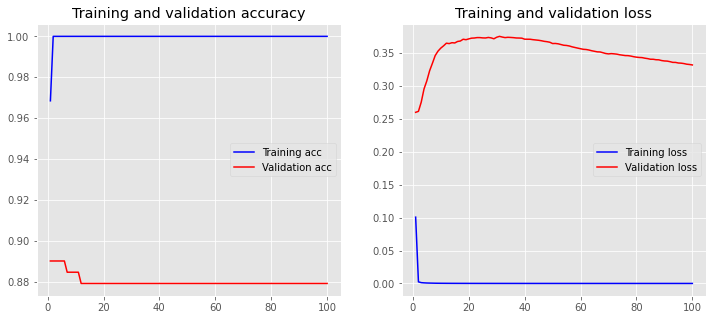

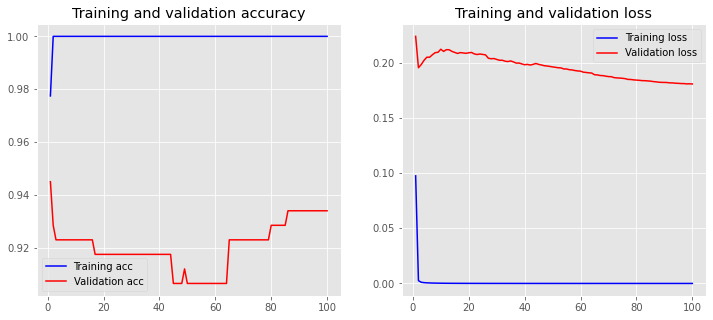

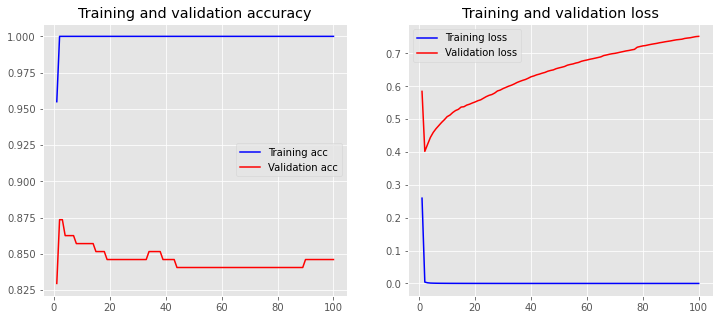

In [14]:
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt

REBUILD_DATA = True

#Создание тренировачных данных при помощи sklearn

class tr():
    start = ""
    SPORT = start + "BD_articles/SportArticles"
    MEDIC = start + "BD_articles/MedArticles"
    MATH = start + "BD_articles/MathArticles"
    testSPORT = start + "BD_Med_Sport_Math/Sport"
    testMEDIC = start + "BD_Med_Sport_Math/Med"
    testMATH = start + "BD_Med_Sport_Math/Math"
    
    LABELS = {SPORT: 0, MEDIC: 1, MATH: 2}    
    testLABELS = {testSPORT: 0, testMEDIC: 1, testMATH: 2}
    
    dataSPORT = []
    tdataSPORT = []
    
    dataMEDIC = []
    tdataMEDIC = []
    
    dataMATH = []
    tdataMATH = []
    
    training_data = []
    SPORTcount = 0
    MEDICcount = 0
    MATHcount = 0
    

    def plot_history(self, history):
        plt.style.use('ggplot')
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, 'b', label='Training acc')
        plt.plot(x, val_acc, 'r', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, 'b', label='Training loss')
        plt.plot(x, val_loss, 'r', label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()

    
    def logicReg(self, data, target):
        
        train = np.array([i["text"] for i in data])
        y_train = np.array([i["label"] for i in data])
        test = np.array([i["text"] for i in target])
        y_test = np.array([i["label"] for i in target])
        
        #train, test, y_train, y_test = train_test_split(
         #   text, y, test_size=0.25, random_state= 10)
        vectorizer = CountVectorizer()
        vectorizer.fit(train)

        X_train = vectorizer.transform(train)
        X_test  = vectorizer.transform(test)
        
        embedding_matrix = np.zeros((vocab_size, embedding_dim))
        
        input_dim = X_train.shape[1]  # Number of features

        model = Sequential()
        model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
        model.add(layers.GlobalMaxPool1D())
        model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
        model.add(layers.Dense(1, activation='sigmoid'))
           
        model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
        model.summary()
        
        history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
        loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
        print("Training Accuracy: {:.4f}".format(accuracy))
        loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
        print("Testing Accuracy:  {:.4f}".format(accuracy))
        self.plot_history(history)
        
    def make_training_data(self):
        for label in self.LABELS:
            for f in tqdm(os.listdir(label)):
                if("_Ref" not in f):
                    # try:
                        tmp = {}
                        path = os.path.join(label, f)
                        #прочитать тексты и запомнить откуда они
                        with open(path, "r", encoding = 'utf-8') as inpt:
                            words = inpt.read()
                            
                            
                            
                            tmp["text"] = words
                            tmp["sourse"] = label
                            tmp["label"] = 0;
                            # print(tmp)
                            tmp["label"] = 1 if label == self.SPORT else 0
                            self.dataSPORT.append(tmp)
                            tmp["label"] = 1 if label == self.MEDIC else 0
                            self.dataMEDIC.append(tmp)
                            tmp["label"] = 1 if label == self.MATH else 0
                            self.dataMATH.append(tmp)
                                
                    # except Exception as e:
                    #    pass
        #для каждого из классов отельная Логистическая регрессия
        
        for label in self.testLABELS:
            for f in tqdm(os.listdir(label)):
                if("_" in f):
                    # try:
                        tmp = {}
                        path = os.path.join(label, f)
                        #прочитать тексты и запомнить откуда они
                        with open(path, "r", encoding = 'utf-8') as inpt:
                            words = inpt.read()



                            tmp["text"] = words
                            tmp["sourse"] = label
                            tmp["label"] = 0;
                            # print(tmp)
                            tmp["label"] = 1 if label == self.testSPORT else 0
                            self.tdataSPORT.append(tmp)
                            tmp["label"] = 1 if label == self.testMEDIC else 0
                            self.tdataMEDIC.append(tmp)
                            tmp["label"] = 1 if label == self.testMATH else 0
                            self.tdataMATH.append(tmp)
        #self.dataSPORT = pd.concat(self.dataSPORT)
        #self.dataMEDIC = pd.concat(self.dataMEDIC)
        #self.dataMATH = pd.concat(self.dataMATH)
        self.logicReg(self.dataSPORT,self.tdataSPORT)
        self.logicReg(self.dataMEDIC,self.tdataMEDIC)
        self.logicReg(self.dataMATH,self.tdataMATH)
        
        
            
            
                
            
            
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        
if REBUILD_DATA:
    t = tr()
    t.make_training_data()

NameError: name 'wordcloud' is not defined